In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [197]:
import numpy as np

In [198]:
df = pd.read_csv(r"D:\Data\predicting-churn-for-bank-customers\Churn_Modelling.csv")

In [199]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [200]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [201]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [202]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## converting Geography to categorical values

In [203]:
g = df.Geography

In [204]:
df["country_codes"] = g.astype('category').cat.codes

In [205]:
df["surname_codes"] = df["Surname"].astype('category').cat.codes

# how to drop columns

In [206]:
df = df.drop(['surname_codes', 'CustomerId', "Geography", "Surname"], axis=1)

drop one column: df.drop('surname_codes', axis=1)

drop multiple: df.drop(['surname_codes', 'CustomerId'], axis=1)

In [207]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_codes
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,2
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,2


In [218]:
#renaming sections
#df = df.rename(columns={"Exited": "label"})
exited_replace = {0: "Stay", 1:"Churn"}
df["label"] = df['Exited'].replace(exited_replace)

In [219]:
df.describe()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_codes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300
std,2886.89568,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529
min,1.00000,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000
75%,7500.25000,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,10000.00000,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000


Balance
CreditScore
EstimatedSalary

In [220]:
df['label'].value_counts()

Stay     7963
Churn    2037
Name: label, dtype: int64

In [221]:
numerical_features = ["Tenure", "CreditScore", "EstimatedSalary"]

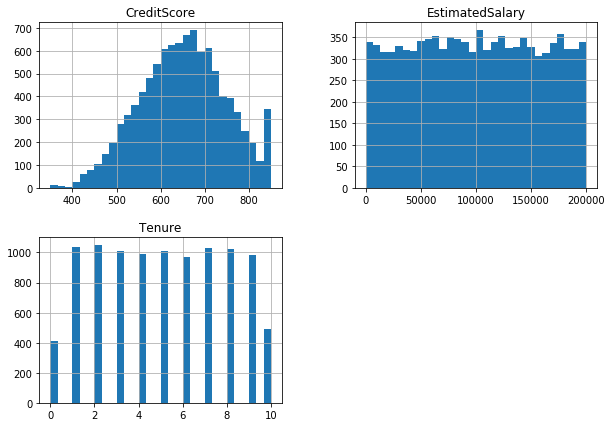

In [222]:
df[numerical_features].hist(bins=30, figsize=(10,7))
plt.show()

In [223]:
n_bins = 30
figsize=(10,7)

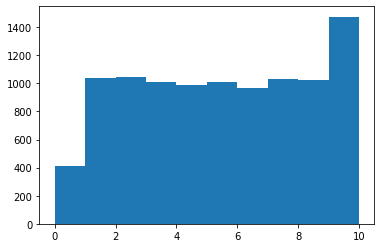

In [224]:
fig = plt.hist(df.Tenure)
plt.show()

In [225]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [226]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [227]:
X = df[numerical_features]
y = df['label']

In [228]:
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

#visualise the tree

In [229]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [230]:
visualize_tree(dt, numerical_features)

In [231]:
dt.n_features_

3

In [232]:
ex = df[numerical_features].loc[:10]

In [233]:
ex

,Tenure,CreditScore,EstimatedSalary
0,2,619,101348.88
1,1,608,112542.58
2,8,502,113931.57
3,1,699,93826.63
4,2,850,79084.10
5,8,645,149756.71
6,7,822,10062.80
7,4,376,119346.88
8,4,501,74940.50
9,2,684,71725.73


In [234]:
dt.predict(ex)

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Churn',
       'Stay', 'Stay', 'Stay'], dtype=object)

In [235]:
dt.score(ex, df['label'].loc[:10])

0.7272727272727273

## going to try to increase this, what if estimated salary gets compressed into quartiles?

In [236]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [237]:
categorical_features = ["Tenure", 'credit_score', "income_decile", 'age_quintile']

In [238]:
df['income_decile'] = pd.qcut(df['EstimatedSalary'],5,labels=False)

In [239]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [240]:
df['age_quintile'] = pd.qcut(df['Age'],5,labels=False)

In [241]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [242]:
df['income_decile'].head()

0    2
1    2
2    2
3    2
4    1
Name: income_decile, dtype: int64

In [243]:
df['credit_score'] = pd.qcut(df['CreditScore'],5,labels=False)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features], df['label'], test_size=0.33, random_state=42)

In [245]:
new_tree = DecisionTreeClassifier(min_samples_split=20, random_state=1)

In [246]:
new_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [247]:
new_tree.score(X_test, y_test)

0.7790909090909091

## get null values in every column

In [248]:
df.isnull().sum(axis = 0)

RowNumber          0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
country_codes      0
label              0
income_decile      0
age_quintile       0
credit_score       0
dtype: int64

In [249]:
df.corr()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_codes,income_decile,age_quintile,credit_score
RowNumber,1.000000,0.005840,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.010358,-0.002638,0.000045,0.006428
CreditScore,0.005840,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.007888,-0.007194,-0.007321,0.954511
Gender,0.018196,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.004719,-0.010083,-0.028565,-0.000694
Age,0.000783,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.022812,-0.006486,0.905531,-0.004697
Tenure,-0.006495,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003739,0.003936,-0.009696,0.003434
Balance,-0.009067,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.069408,0.009131,0.039983,0.010118
NumOfProducts,0.007246,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.003972,0.015318,-0.031366,0.015281
HasCrCard,0.000599,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.008523,-0.010704,-0.019031,-0.003066
IsActiveMember,0.012044,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.006724,-0.011743,0.037340,0.022666
EstimatedSalary,-0.005988,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.001369,0.979628,-0.000983,0.000742


In [250]:
# I need age in the tree

In [251]:
dt3 = DecisionTreeClassifier(min_samples_split=20, random_state=1, min_samples_leaf=20)

In [252]:
X_features = ["Tenure", 'credit_score', "income_decile", 'age_quintile']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(df[X_features], df['label'], test_size=0.33, random_state=42)

In [254]:
dt3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [255]:
dt3.score(X_test, y_test)

0.7966666666666666

In [256]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

In [257]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [258]:
type(y_train)

pandas.core.series.Series

In [259]:
y_values = y_train.values

In [260]:
type(y_values.astype(np.string_))

numpy.ndarray

In [261]:
dot_data = export_graphviz(dt3, out_file=None, 
                                feature_names=X_features, class_names=y_values.astype(np.str))

In [262]:
graph = pydotplus.graph_from_dot_data(dot_data)

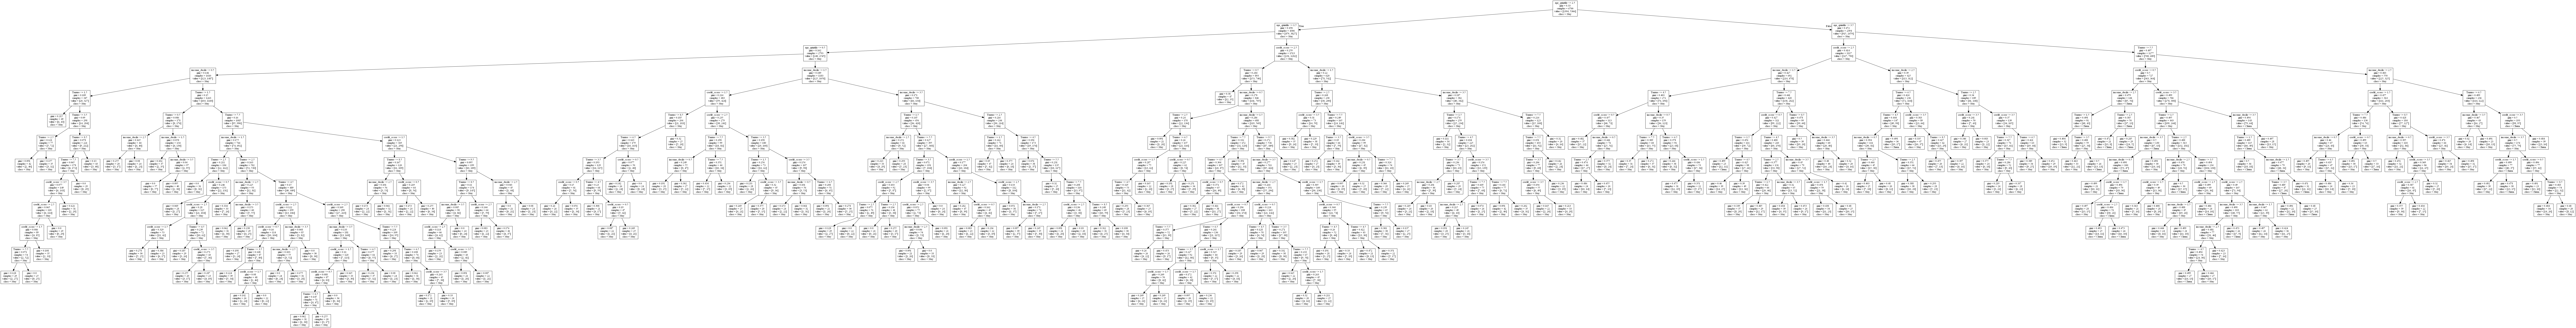

In [263]:
Image(graph.create_png())

In [264]:
dt3.n_features_

4

In [265]:
dt3.feature_importances_

array([0.14878295, 0.08170695, 0.08157946, 0.68793063])

In [266]:
dt3.get_depth()

14

# DT4

In [267]:
dt4 = DecisionTreeClassifier(min_samples_split=100, random_state=1, min_samples_leaf=50, max_depth=8)

In [268]:
# replace 'Balance' with quartiles

df['balance_quartile'] = pd.cut(df['Balance'], labels=False, bins=4)

In [269]:
df['balance_quartile'].value_counts()

0    3813
1    3493
2    2612
3      82
Name: balance_quartile, dtype: int64

In [270]:
df.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'country_codes', 'label', 'income_decile', 'age_quintile',
       'credit_score', 'balance_quartile'],
      dtype='object')

In [278]:
X_features = ["Tenure", 'credit_score', "income_decile", 'age_quintile', 'balance_quartile','country_codes', 'Gender', 'NumOfProducts','HasCrCard']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(df[X_features], df['label'], test_size=0.33, random_state=42)

In [280]:
dt4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [281]:
dt4.score(X_test, y_test)

0.8454545454545455

In [282]:
dot_data = export_graphviz(dt4, out_file=None, 
                                feature_names=X_features, class_names=y_values.astype(np.str))

In [283]:
graph = pydotplus.graph_from_dot_data(dot_data)

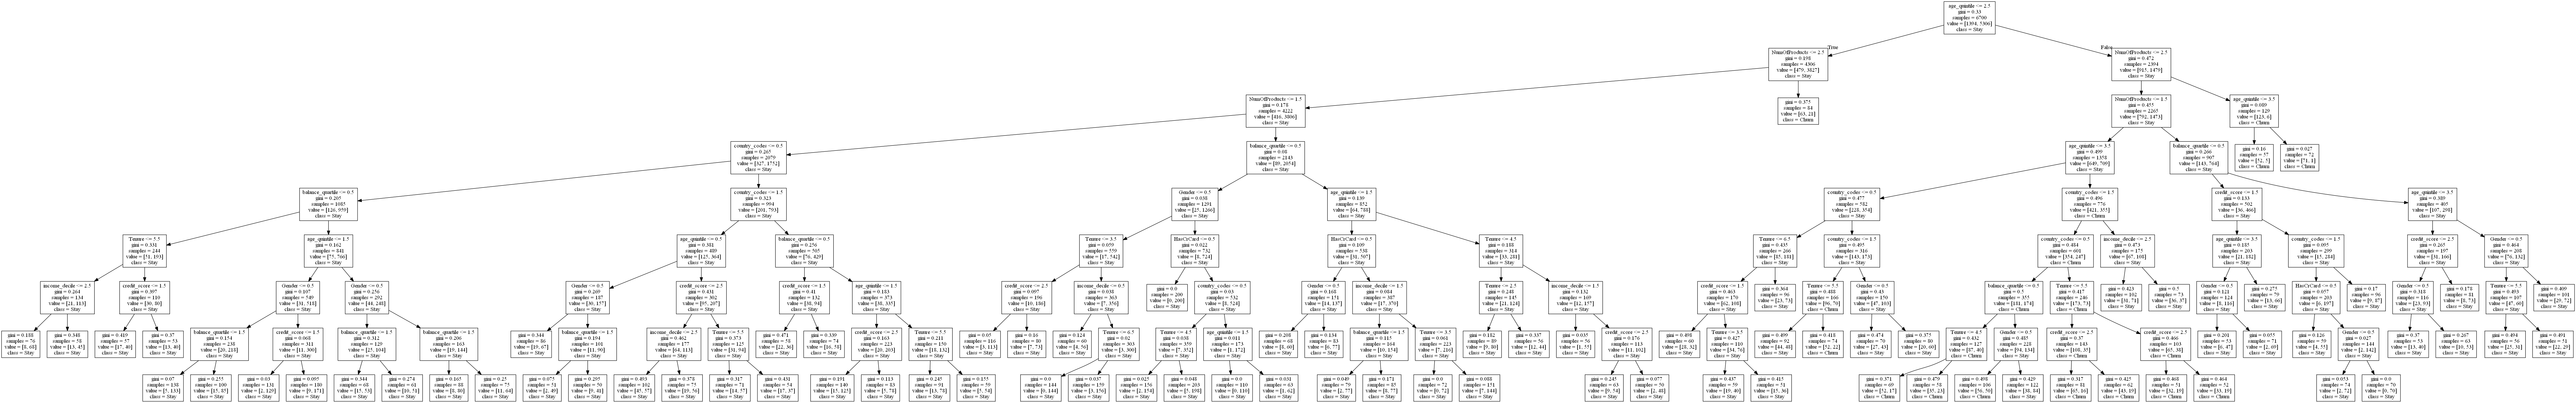

In [284]:
Image(graph.create_png())

In [285]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [286]:
X_path = X_train[:10]

In [287]:
df

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_codes,label,income_decile,age_quintile,credit_score,balance_quartile
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,0,Churn,2,3,1,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,2,Stay,2,3,1,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,0,Churn,2,3,0,2
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,0,Stay,2,2,3,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,2,Stay,1,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,1,39,5,0.00,2,1,0,96270.64,0,0,Stay,2,2,4,0
9996,9997,516,1,35,10,57369.61,1,1,1,101699.77,0,0,Stay,2,1,0,0
9997,9998,709,0,36,7,0.00,1,0,1,42085.58,1,0,Churn,1,2,3,0
9998,9999,772,1,42,3,75075.31,2,1,0,92888.52,1,1,Churn,2,3,4,1


In [295]:
importances = []
for i in range(len(X_features)):
    importances.append([X_features[i], dt4.feature_importances_[i]])

In [300]:
importances.sort(key=lambda x: x[1], reverse=True)
print(importances)

[['NumOfProducts', 0.423490166206762], ['age_quintile', 0.3701091240246034], ['country_codes', 0.0741779244746417], ['balance_quartile', 0.06728596969250751], ['Tenure', 0.020367804200022457], ['Gender', 0.018562077690567613], ['credit_score', 0.013511399458314617], ['income_decile', 0.01132447584832779], ['HasCrCard', 0.0011710584042530043]]


In [293]:
df['HasCrCard'].describe()

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64